In [1]:
import numpy as np
import pandas as pd
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score
import matplotlib.pyplot as plt

In [2]:
data = {
    "RAM_GB": [4, 8, 8, 16, 16, 32, 4, 8, 16, 32],
    "SSD_GB": [128, 256, 512, 512, 1024, 1024, 128, 256, 512, 1024],
    "CPU_Score": [1200, 2000, 2200, 2600, 3000, 3500, 1100, 1900, 2500, 4000],
    "Weight_kg": [2.2, 2.0, 1.8, 1.9, 2.1, 2.3, 2.4, 2.0, 1.7, 1.8],
    "Price": [30000, 45000, 55000, 65000, 75000, 95000, 28000, 43000, 70000, 120000]
}

df = pd.DataFrame(data)

In [3]:
X = df.drop("Price", axis=1)
y = df["Price"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [4]:
model = GradientBoostingRegressor(
    n_estimators=200,
    learning_rate=0.05,
    max_depth=3,
    random_state=42
)

model.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.05, n_estimators=200, random_state=42)

In [5]:
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MAE:", mae)
print("R² Score:", r2)

MAE: 4639.116371896143
R² Score: 0.8176642050335684


In [6]:
importances = pd.DataFrame({
    "Feature": X.columns,
    "Importance": model.feature_importances_
}).sort_values(by="Importance", ascending=False)

print(importances)

     Feature  Importance
2  CPU_Score    0.455445
1     SSD_GB    0.408217
3  Weight_kg    0.118080
0     RAM_GB    0.018258


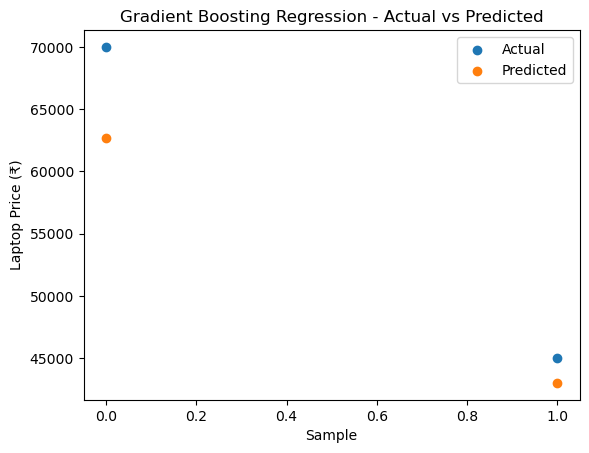

In [7]:
plt.scatter(range(len(y_test)), y_test, label="Actual")
plt.scatter(range(len(y_pred)), y_pred, label="Predicted")
plt.xlabel("Sample")
plt.ylabel("Laptop Price (₹)")
plt.title("Gradient Boosting Regression - Actual vs Predicted")
plt.legend()
plt.show()